IDs: 

- 318299559
- 227367455

## Imports

In [1]:
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats

In [4]:
plt.rcParams['figure.figsize'] = (14.0, 8.0)

## Load Data and Preprocessing

In [5]:
data_path = "AMI_GSE66360_series_matrix.csv"

In [6]:
raw_data = pd.read_csv(data_path, encoding='unicode_escape', header = None)
data = raw_data[59:].set_index(0).T
unfiltered_shape = data.shape

/Users/dan/Google Drive/School/IDC/Year III/Semester 1/Statistics and Data Analysis/Exercices/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data.dropna(axis='columns', inplace=True)
shape = data.shape
data.iloc[:,2: shape[1] - 1] = data.iloc[:,2: shape[1] - 1].apply(pd.to_numeric)

In [8]:
data

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866378,8.22579,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
4,H,GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.24214,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017833,7.83145,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.35573,6.206879,6.21793,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811
96,M,GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138
97,M,GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841,7.442701,7.147417,6.587065,2.72932,8.699222,6.59835,5.577456,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.48528,2.711413,2.833818,3.52341,3.812564


## Analysis

### A) High level description of the data and some pre-processing

#### 1) How many genes profiled?

In [9]:
print(f"There are {unfiltered_shape[1] - 2} genes profiled")

There are 54675 genes profiled


#### 2) How many samples (subjects/patients) in total?

In [10]:
print(f"There are {unfiltered_shape[0]} patients")

There are 99 patients


#### 3) How many samples in each class?


In [11]:
print(f"There are {sum(1 if x else 0 for x in (data['Class'] == 'M'))} patients with Myocardial Infraction")
print(f"And there are {sum(1 if x else 0 for x in (data['Class'] == 'H'))} healthy patients")

There are 49 patients with Myocardial Infraction
And there are 50 healthy patients


#### 4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [12]:
print(f"There are {shape[1] - 2} rows left. {unfiltered_shape[1] - shape[1]} were removed.")

There are 54628 rows left. 47 were removed.


#### 5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

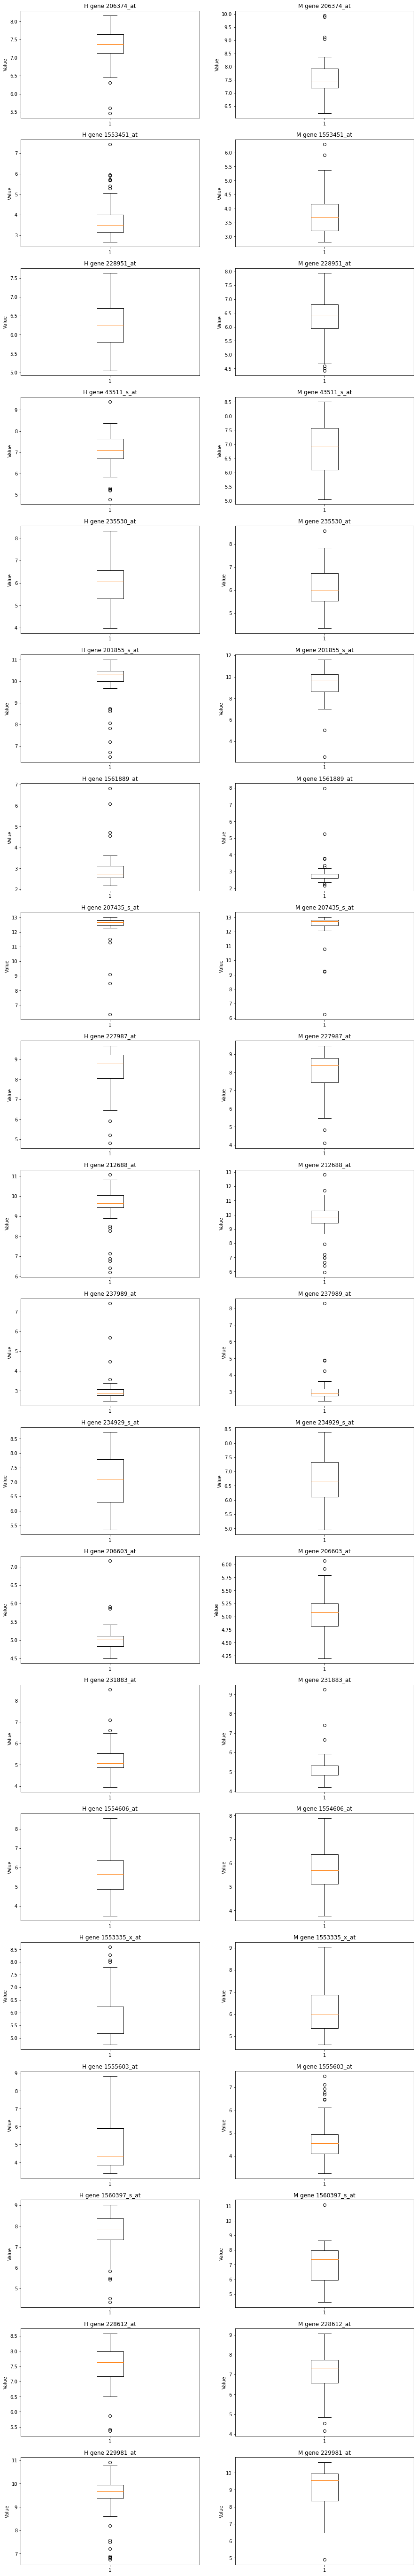

In [13]:
np.random.seed(42)
random_genes = np.random.randint(2, shape[1] - 1, 20 )

data_H = data[data['Class'] == 'H']
data_M = data[data['Class'] == 'M']
fig, ax = plt.subplots(20, 2, figsize=(15, 5 * 20))

for i, gene in enumerate(random_genes):
    ax[i][0].set_title(f"H gene {data.columns[gene]}")
    ax[i][0].boxplot(data_H.iloc[:, gene])
    ax[i][0].set_ylabel('Value')
    ax[i][1].set_title(f"M gene {data.columns[gene]}")
    ax[i][1].set_ylabel('Value')
    ax[i][1].boxplot(data_M.iloc[:, gene])


### B) WRS for differential expression (DE)
#### 1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

$B = 49, N= 99$


$\mu_{M} = \frac{49(99 + 1)}{2} = 2450$

#### 2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

For the value to be maximal we will consider that the samples labeled M have all a higher value than those in H.

That is, all M is ranked 51 to 99

$ \sum_{i=51}^99 i = 49 \cdot \frac{51 + 99}{2} = 3675$

#### 3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

There are in total ${99 \choose 49}$ different options that is $|\Omega| \sim (\frac{99}{49})^{49} \sim 2^{49}$

As we saw, there is only one possible setup (it doesnt matter the order of the samples as e only consider their labels once they are ordered) in which we have the rank of all the class M higher than the rank of the class H.

Thus, $P( RS(g) = 3675) = \frac{1}{|\Omega|} \sim  2^{-49}$, that is a very small probability

#### 4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (Provide formulas and explain them)

From the previous ordering we have the ranking $HHHHH...HHHMMM...MMM$

To decrease RS(g) by 1 we can only have $HHHHH...HHMHMM...MMM$ so theres only 1 option.

$P( RS(g) = 3674) = \frac{1}{|\Omega|} \sim  2^{-49}$

With RS(g) = 2, we have 2 possibilities: $HHHHH...HHMMH....MMM$ or $HHHHH...HHMHHM....MMM$ 

$P( RS(g) = 3673) =  \frac{2}{|\Omega|} \sim  2^{-48}$

#### 5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

IQR = 329.0


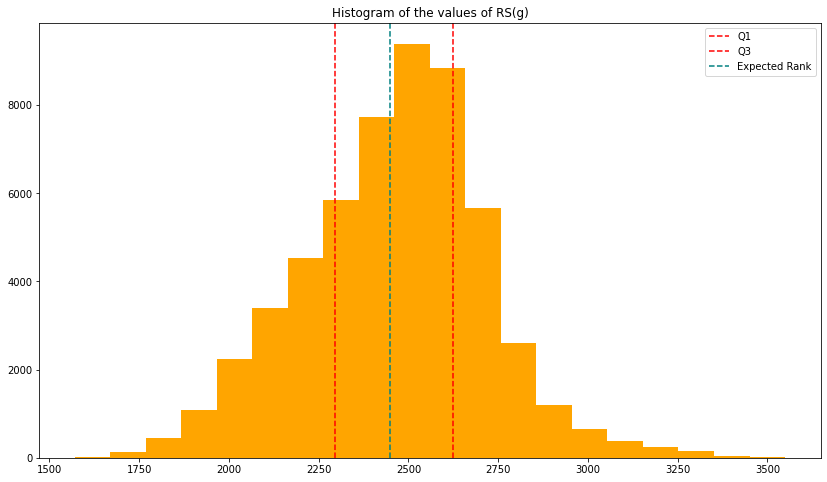

In [14]:
RS_M = data.iloc[:,2:].rank()[data['Class'] == 'M'].sum()
plt.hist(RS_M, bins = 20, color='orange')
plt.axvline(x=RS_M.quantile(0.25), color= 'r', ls='--', label = "Q1")
plt.axvline(x=RS_M.quantile(0.75), color= 'r', ls='--', label = "Q3")
plt.axvline(x=2450, color= 'teal', ls='--', label = "Expected Rank")
plt.title("Histogram of the values of RS(g)")
plt.legend()
IQR = RS_M.quantile(0.75) - RS_M.quantile(0.25)
print(f"IQR = {IQR}")
plt.show()

### C) Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [15]:
alpha = 0.07

WRS test:

In [16]:
wrs_stats = data.iloc[:,2:].apply(lambda col: stats.ranksums(col[data['Class'] == 'M'], col[data['Class'] == 'H']), axis=0)
wrs_stats[1:] /= 2 # 1-tailed 
wrs_stats.index = ['stat', 'p-val']

In [17]:
wrs_stats

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
stat,-1.021787,1.077775,4.290106,0.629869,1.035784,-1.679650,-3.079359,1.686649,-2.918392,-3.681233,...,0.0,-0.153968,0.640367,0.804832,2.365507,2.281525,2.204541,1.574672,1.469694,1.672652
p-val,0.153441,0.140567,0.000009,0.264390,0.150151,0.046513,0.001037,0.045835,0.001759,0.000116,...,0.5,0.438818,0.260967,0.210458,0.009003,0.011259,0.013743,0.057666,0.070822,0.047198


In [18]:
wrs_significant = wrs_stats.iloc[:,list(wrs_stats.loc['p-val']  <= alpha)]
print(f"There are {sum(wrs_significant.loc['stat']  >= 0)} overexpressed genes and "
      f"{sum(wrs_significant.loc['stat']  < 0)} underexpressed genes with a p-value less than 0.07.")

There are 10787 overexpressed genes and 10667 underexpressed genes with a p-value less than 0.07.


Student T-test:

In [19]:
ttest_stats = data.iloc[:,2:].apply(lambda col: stats.ttest_ind(col[data['Class'] == 'M'], col[data['Class'] == 'H'], equal_var=True), axis=0)
ttest_stats[1:] /= 2 # 1-tailed 
ttest_stats.index = ['stat', 'p-val']

In [20]:
ttest_stats

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
stat,-1.278585,0.447602,4.041393,0.102599,0.481005,-1.25881,-2.885473,2.406316,-2.154836,-4.055713,...,-0.616825,-0.838321,-0.598171,-0.755246,2.221230,1.108412,0.961627,1.051736,0.617371,1.471453
p-val,0.102047,0.327719,0.000053,0.459246,0.315798,0.10556,0.002408,0.009004,0.016825,0.000051,...,0.269398,0.201956,0.275560,0.225966,0.014331,0.135212,0.169314,0.147767,0.269218,0.072203


In [21]:
ttest_significant = ttest_stats.iloc[:,list(ttest_stats.loc['p-val'] <= alpha)]
print(f"There are {sum(ttest_significant.loc['stat']  >= 0)} overexpressed genes and "
      f"{sum(ttest_significant.loc['stat']  < 0)} underexpressed genes with a p-value less than 0.07.")

There are 8517 overexpressed genes and 8639 underexpressed genes with a p-value less than 0.07.


In [22]:
ttest_stats.loc['p-val'] <= alpha

0
1007_s_at          False
1053_at            False
117_at              True
121_at             False
1255_g_at          False
                   ...  
AFFX-ThrX-5_at     False
AFFX-ThrX-M_at     False
AFFX-TrpnX-3_at    False
AFFX-TrpnX-5_at    False
AFFX-TrpnX-M_at    False
Name: p-val, Length: 54628, dtype: bool

### D) Correlations 

Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.

In [23]:
wrs_significant

,117_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1552271_at,1552276_a_at,1552277_a_at,1552279_a_at,...,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-thr-5_s_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-M_at
stat,4.290106,-1.679650,-3.079359,1.686649,-2.918392,-3.681233,1.784628,2.351510,-2.547469,1.728640,...,1.763633,1.966590,3.233326,1.994585,1.882608,2.365507,2.281525,2.204541,1.574672,1.672652
p-val,0.000009,0.046513,0.001037,0.045835,0.001759,0.000116,0.037161,0.009349,0.005425,0.041937,...,0.038897,0.024615,0.000612,0.023044,0.029877,0.009003,0.011259,0.013743,0.057666,0.047198


In [24]:
n = 80
data_wrs_overexpressed = wrs_significant.iloc[:,list(wrs_significant.loc['stat'] >= 0)].T
data_wrs_underexpressed = wrs_significant.iloc[:,list(wrs_significant.loc['stat'] < 0)].T
over = data_wrs_overexpressed.nsmallest(n=n, columns="p-val")
under = data_wrs_underexpressed.nsmallest(n=n, columns="p-val")
D = pd.concat([over, under])

In [25]:
D

,stat,p-val
0,,
208869_s_at,7.691398,7.276809e-15
216248_s_at,7.663404,9.053458e-15
204622_x_at,7.348469,1.002448e-13
244054_at,7.229494,2.423984e-13
203887_s_at,7.215497,2.686869e-13
...,...,...
235779_at,-5.007457,2.757695e-07
242874_at,-5.003958,2.808256e-07
1565882_at,-4.996959,2.912071e-07


#### 1) Compute Kendall $\tau$ correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.  

In [26]:
data_numeric = data.drop(['Class','ID_REF'],axis=1).astype('float',errors='ignore')
D_tau = data_numeric[D.index.values].corr(method='kendall')

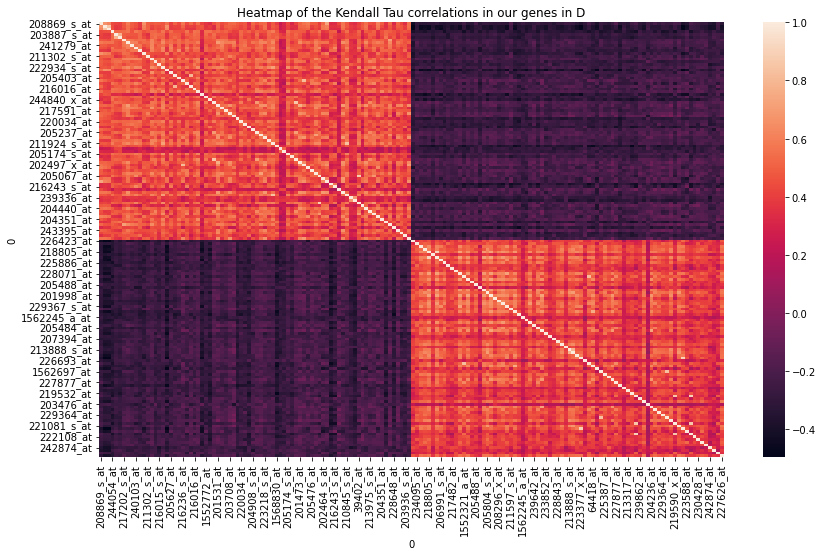

In [27]:
sns.heatmap(D_tau)
plt.title("Heatmap of the Kendall Tau correlations in our genes in D")
plt.show()

#### 2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for $\tau$?  

Under the null model if both of the pairs were independent then they would have a correlation of 0.

$\frac{C-D}{C+D} = 0 \iff C - D = 0 \iff C = D$

We would expect that overall that on all the samples C = D.

#### 3) Now compute the Kendall $\tau$ correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.  

In [28]:
overexp_tau = data_numeric[over.index.values].corr(method='kendall')

In [29]:
overexp_tau

,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,209774_x_at,232213_at,204351_at,235568_at,200648_s_at,228648_at,243395_at,211628_x_at,203936_s_at,218319_at
0,,,,,,,,,,,,,,,,,,,,,
208869_s_at,1.000000,0.664399,0.617811,0.433519,0.419913,0.408369,0.475984,0.584003,0.489177,0.457019,...,0.435993,0.607091,0.486704,0.360544,0.525046,0.313544,0.513915,0.423624,0.337868,0.552257
216248_s_at,0.664399,1.000000,0.851165,0.448361,0.386106,0.386931,0.466089,0.555968,0.484230,0.450423,...,0.414554,0.587302,0.434756,0.348176,0.466502,0.360544,0.494949,0.463203,0.394764,0.553906
204622_x_at,0.617811,0.851165,1.000000,0.457019,0.373325,0.392290,0.442589,0.554731,0.450010,0.400536,...,0.379509,0.550608,0.380746,0.371676,0.446300,0.355184,0.451659,0.465265,0.391053,0.534529
244054_at,0.433519,0.448361,0.457019,1.000000,0.522160,0.531231,0.534529,0.562564,0.460317,0.576582,...,0.506906,0.353948,0.447124,0.510616,0.496186,0.452896,0.401773,0.455782,0.476397,0.441765
203887_s_at,0.419913,0.386106,0.373325,0.522160,1.000000,0.783137,0.495362,0.476397,0.468975,0.466502,...,0.490827,0.337044,0.439291,0.530818,0.447949,0.459905,0.362606,0.457844,0.387755,0.361369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228648_at,0.313544,0.360544,0.355184,0.452896,0.459905,0.480519,0.406308,0.405483,0.428571,0.403834,...,0.365492,0.238920,0.380746,0.476397,0.353948,1.000000,0.264482,0.374562,0.450423,0.195630
243395_at,0.513915,0.494949,0.451659,0.401773,0.362606,0.341991,0.482169,0.576170,0.511853,0.464028,...,0.494949,0.570398,0.512678,0.311482,0.528757,0.264482,1.000000,0.474335,0.382808,0.571635
211628_x_at,0.423624,0.463203,0.465265,0.455782,0.457844,0.442177,0.522985,0.513090,0.463616,0.381159,...,0.550608,0.446300,0.445475,0.494949,0.496186,0.374562,0.474335,1.000000,0.421975,0.512678


In [30]:
list_p_val_over = []

for i in range(len(overexp_tau)):
    for j in range(i+1, len(overexp_tau)):
        list_p_val_over.append(overexp_tau.to_numpy()[i][j])

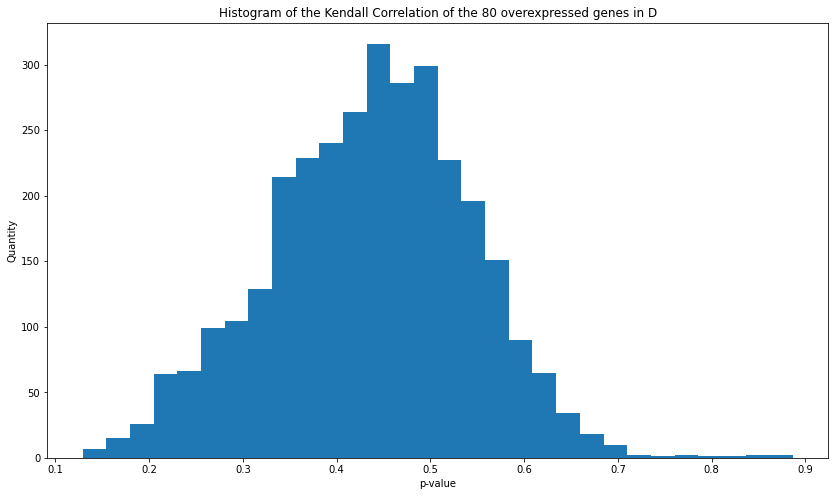

In [31]:
plt.hist(list_p_val_over, bins = 30)
plt.title("Histogram of the Kendall Correlation of the 80 overexpressed genes in D")
plt.xlabel("p-value")
plt.ylabel("Quantity")
plt.show()

In [32]:
kendall_mean = D_tau.mean().mean()

print(f"{kendall_mean = } > 0" )

kendall_mean = 0.09016181231892698 > 0


#### 4) What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression levels of genes, across a set of samples)?



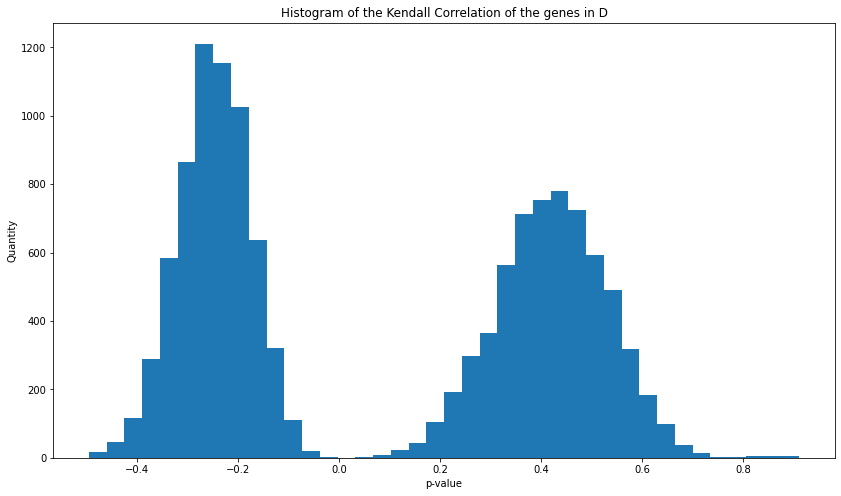

In [33]:
dict_p_val_D = {}

Dnp = D_tau.to_numpy()

for i in range(len(D)):
    for j in range(i+1, len(D_tau)):
        dict_p_val_D[(D_tau.columns[i], D_tau.columns[j])] = Dnp[i][j]

plt.hist(dict_p_val_D.values(), bins = 40)
plt.title("Histogram of the Kendall Correlation of the genes in D")
plt.xlabel("p-value")
plt.ylabel("Quantity")
plt.show()

The right gaussian most likely shows there is a strong positive co-expression among the overexpressed genes and also among the underexpressed genes.

Using the same logic, in the left gaussian we can see negative correlation between the overexpressed and underexpressed genes.

Within overexpressed genes, we expect a relatively high amount of concordant pairs, since, when you look at a pair of (M, H) - You expect that M's expression levels will be higher than H's - so they will be concordant in terms of kendall.

The opposite logic goes for the over vs. under correlations.
We now calculate how many significant co-expressed gene pairs there are:

In [34]:
alpha = 0.07 * 2 # 1-tailed
correlation_threshold = 0.5

def calc_corr_pval(data):
    number_of_genes = len(data.columns)
    corrs =  np.zeros([number_of_genes, number_of_genes])
    pvals =  np.zeros([number_of_genes, number_of_genes])
    for i in range(number_of_genes):
        for j in range(i + 1, number_of_genes):
            c, p = stats.kendalltau(data.iloc[:,i],data.iloc[:,j])
            corrs[i,j] = c
            pvals[i,j] = p
    return corrs, pvals

corrs , pvals =  calc_corr_pval(data[D.index])

significant = pvals[(pvals < alpha) & (corrs > correlation_threshold)]

significant_pairs = len(significant)

print(f"{significant_pairs = }")

significant_pairs = 1521


#### 5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.

Because finding all the coexpressed pairs and their FDR would take sensibly too much time we will only consider the pairs in D which have positive correlation.

We see that a lot of genes have an FDR under 0.05. This is because we can think that gene expression is very randoim and therefor there is a high probability that it is unlikely that the genes got lucky in their expression that they could be very similar.

In [35]:
def compute_fdr(pvals, fdr_th=0.05):
    # assumption that the p-val are unique and therefore ranked differently
    history = np.array([pval * len(pvals) / (i + 1) for i, pval in enumerate(sorted(pvals))])
    nb_under = (history <= fdr_th).sum()
    return history, nb_under
    
pval_pos_corr =  pvals[corrs > 0]
history, nb_under = compute_fdr(pval_pos_corr[pval_pos_corr > 0])
print(f"FDR(0.05) = {nb_under} while the total amount of values is {len(pval_pos_corr)}")

FDR(0.05) = 6291 while the total amount of values is 6320


#### 6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?

**Advantages:**
Complete Analysis of the entire data would mean less room for error and more accurate conclusions
1.  We'd be 100% there are no missing significant co-expressions, etc...
2. Trends in D may not represent all of the data, therefore it may give a wrong impression, or we'd be missing some interesting correlations that just didn't make it to the top 80.
3. We'd be able to recognize more outliers.

**Disadvantages:**
1. Time: There are more then 54K genes in the data, looking at every pair (at least 54K choose 2 pairs ~ 1.5B pairs) will take a long time.
2. Computation: We'll have to use a lot of computational power in order to compute this proccess on the 1.5 billion pairs - Expensive!
3. Visualizing: Much eaier to visualize the trends and results with D and involve human analysis in the process.
4. We may encounter more false positives - It is more probable with a larger number of genes being examined.

### E) Plots and Conclusions of the DE and correlation analysis

#### 1) Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c.
State, for each comparison, the number of genes, k, at which we observe:

- FDR = 0.05
- FDR = 0.01
- FDR = 0.005

If these events are not observed at any k>0, then make that statement.

In [36]:
ttest_sig_overexp = ttest_stats.iloc[:,list(ttest_stats.loc['stat'] >= 0)]

ttest_sig_overexp.loc['stat']

0
1053_at            0.447602
117_at             4.041393
121_at             0.102599
1255_g_at          0.481005
1320_at            2.406316
                     ...   
AFFX-ThrX-5_at     1.108412
AFFX-ThrX-M_at     0.961627
AFFX-TrpnX-3_at    1.051736
AFFX-TrpnX-5_at    0.617371
AFFX-TrpnX-M_at    1.471453
Name: stat, Length: 29390, dtype: float64

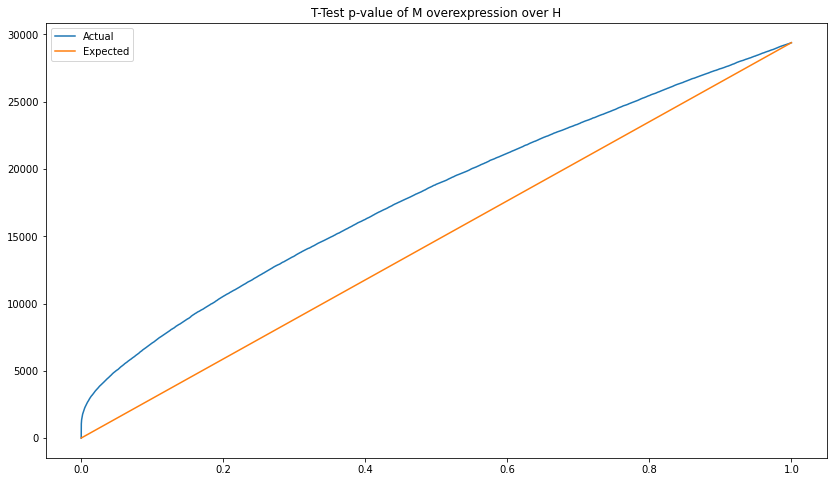

FDR(0.05) = 2041
FDR(0.01) = 1276
FDR(0.005) = 1080


In [37]:
plt.plot( sorted(ttest_sig_overexp.loc['p-val'] * 2) , np.arange(ttest_sig_overexp.shape[1]), label = 'Actual')
plt.plot( np.arange(ttest_sig_overexp.shape[1]) / ttest_sig_overexp.shape[1], np.arange(ttest_sig_overexp.shape[1]), label = 'Expected')
plt.legend()
plt.title("T-Test p-value of M overexpression over H")
plt.show()

for threshold in [0.05, 0.01, 0.005]:
    hist, fdr = compute_fdr(ttest_sig_overexp.loc['p-val'] * 2, fdr_th=threshold)
    print(f'FDR({threshold}) = {fdr}')

In [38]:
wrs_sig_overexp = wrs_stats.iloc[:,list(wrs_stats.loc['stat'] >= 0)]

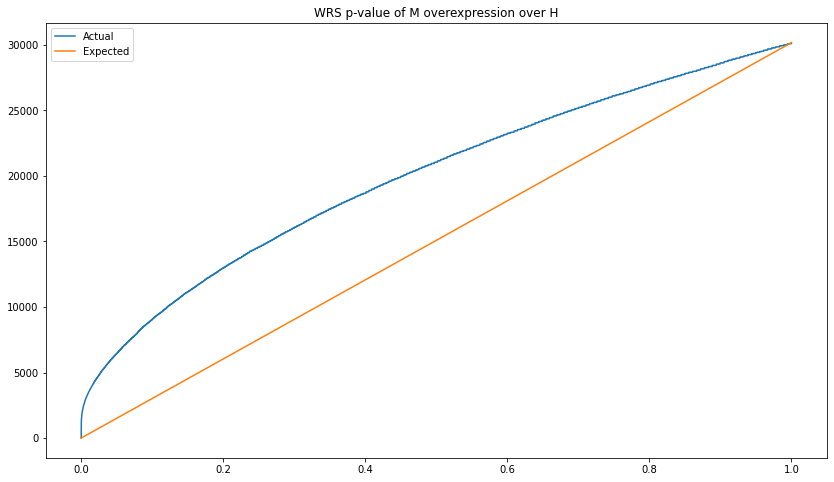

FDR(0.05) = 2674
FDR(0.01) = 1552
FDR(0.005) = 1277


In [39]:
plt.plot( sorted(wrs_sig_overexp.loc['p-val'] * 2) , np.arange(wrs_sig_overexp.shape[1]), label = "Actual")
plt.plot( np.arange(wrs_sig_overexp.shape[1]) / wrs_sig_overexp.shape[1], np.arange(wrs_sig_overexp.shape[1]), label='Expected')
plt.legend()
plt.title("WRS p-value of M overexpression over H")
plt.show()

for threshold in [0.05, 0.01, 0.005]:
    hist, fdr = compute_fdr(wrs_sig_overexp.loc['p-val'] * 2, fdr_th=threshold)
    print(f'FDR({threshold}) = {fdr}')

#### 2) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

/var/folders/s1/1wbz3jx549s9m620xqw7ffgh0000gp/T/ipykernel_51749/3597692773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples['Class'] = data.Class


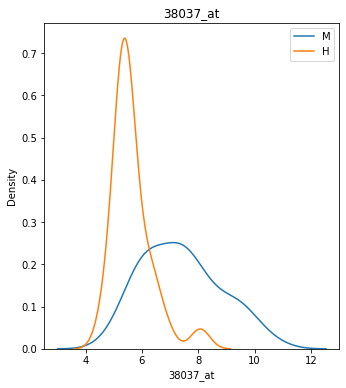

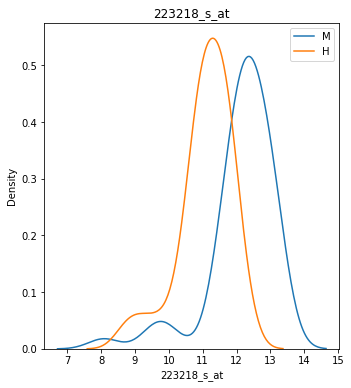

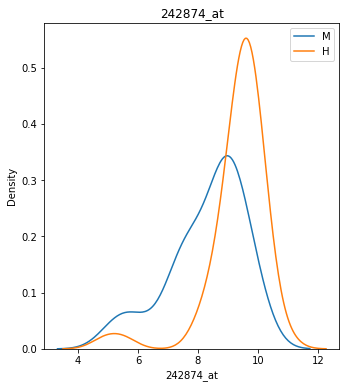

In [40]:
samples = D.sample(n=3)
samples = data[samples.index]    
samples['Class'] = data.Class
for c in samples.columns.drop('Class'):
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1)
    sns.kdeplot(data=samples[samples.Class=='M'][c], label="M")
    sns.kdeplot(data=samples[samples.Class=='H'][c], label="H")
    plt.legend()
    plt.title(c)

#### 3) Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.

Text(68.09375, 0.5, 'Genes')

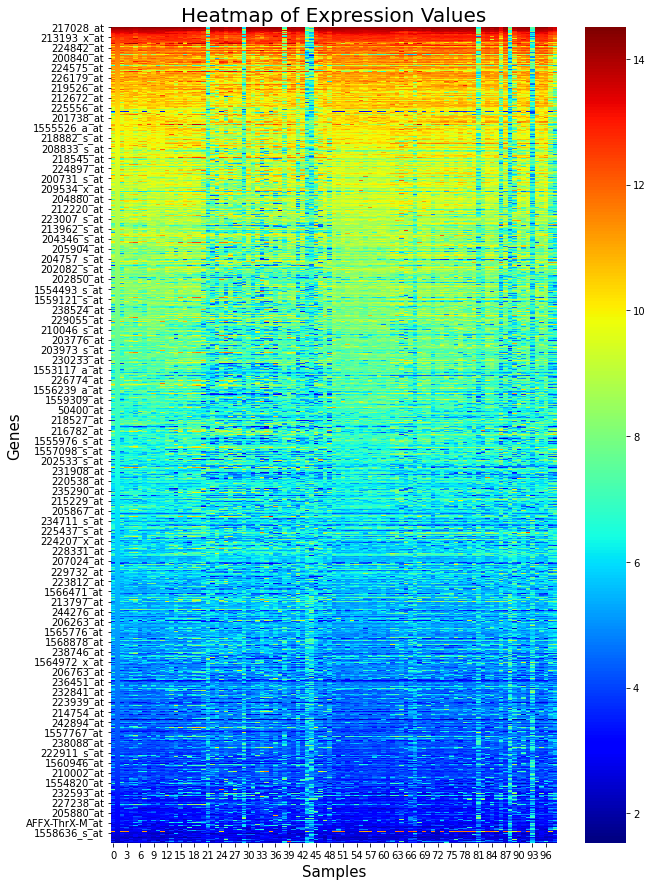

In [41]:
over = data_numeric[data_wrs_overexpressed.index]
under = data_numeric[data_wrs_underexpressed.index]

H_over = over.T[data_numeric[data['Class'] == 'H'].index]
H_under = under.T[data_numeric[data['Class'] == 'H'].index]

M_over = over.T[data_numeric[data['Class'] == 'M'].index]
M_under = under.T[data_numeric[data['Class'] == 'M'].index]

upper_genes = pd.concat([M_under, H_under], axis=1, ignore_index=True)
lower_genes = pd.concat([M_over, H_over], axis=1, ignore_index=True)
all_genes = pd.concat([upper_genes, lower_genes]).sort_values(by=[1], ascending=False)

plt.figure(figsize = (10, 15))
sns.heatmap(all_genes, cmap=plt.cm.jet)
plt.title('Heatmap of Expression Values', fontsize=20)
plt.xlabel('Samples', fontsize=15)
plt.ylabel('Genes', fontsize=15)